In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
import sys
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
import math
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.metrics import confusion_matrix
sb.set()

In [10]:
time_1=pd.read_csv(r"Labelled_Files_1/features/time_1.csv")
freq_1=pd.read_csv(r"Labelled_Files_1/features/freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-173.968750,-161,-191,67.749023,8.230979,174.163357,173.968750,0.0,30,...,-1.279370,96.494643,88.051405,8.557427,-0.872340,89.489531,136.257608,9.806951,-1.097899,138.768663
2,0,-175.250000,-151,-202,88.531250,9.409105,175.502404,175.250000,0.0,51,...,-0.865323,56.195788,63.713318,7.871782,-0.394283,63.921791,74.847254,9.314909,-0.680520,75.500136
3,0,-163.968750,-141,-181,89.624023,9.466997,164.241819,163.968750,0.0,40,...,5.093917,344.585264,65.109948,9.225050,-1.171882,66.581253,218.366460,9.725060,-0.927582,225.153998
4,0,-160.375000,-141,-191,118.359375,10.879309,160.743585,160.375000,0.0,50,...,13.650000,633.804876,64.618683,8.919283,-0.940924,63.942849,218.073292,8.902031,0.603874,216.260808
5,0,-180.484375,-161,-202,138.593506,11.772574,180.867916,180.484375,0.0,41,...,5.606094,491.672603,144.043261,9.642371,-1.334032,141.936111,265.252185,7.097721,1.180612,271.647464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9185,1,79.734375,1040,-1010,46615.226318,215.905596,230.158200,137.015625,7.5,2050,...,3.314342,10636.646363,13458.929199,7.666057,0.646355,13279.468369,4693.095945,8.241055,2.220484,4545.136553
9186,1,80.796875,575,-505,25858.318115,160.805218,179.962366,135.953125,4.0,1080,...,9.749269,6551.998413,4813.087801,5.625249,3.857585,4950.174464,5675.247313,10.149863,-0.362134,5609.410490
9187,1,191.671875,1010,-828,96278.407959,310.287621,364.714293,277.671875,8.0,1838,...,21.375321,49319.739171,19045.847026,4.241639,2.853981,18826.461026,7200.020385,7.717877,0.305171,7450.732579
9188,1,223.484375,2929,-1212,552690.218506,743.431381,776.296003,427.453125,13.0,4141,...,24.027554,60586.894084,19985.025116,4.481814,8.753087,19957.000305,8021.491914,6.274847,2.071851,7714.673241


In [11]:
data_array = combined_1.to_numpy()
npy_file = r"train_data.npy"
np.save(npy_file, data_array)

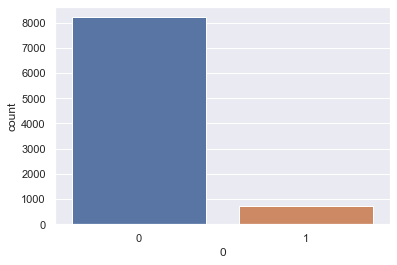

In [12]:
X = combined_1.drop('0', axis=1)
y = combined_1['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [13]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

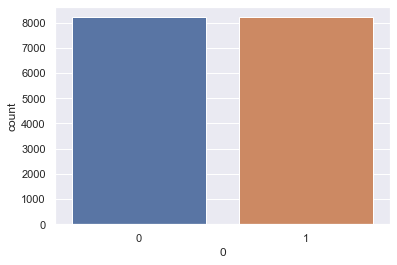

In [14]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [15]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [16]:
def getsize(model):
  p = pickle.dumps(model)
  return sys.getsizeof(p)

In [17]:
# Define custom function for specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

# Define a custom function that calculates the harmonic mean of sensitivity and specificity
def harmonic_mean(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Create a custom scorer
custom_scorer = make_scorer(harmonic_mean, greater_is_better=True)

In [25]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 25, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 202
max_resources_: 16430
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 90
n_resources: 202
Fitting 5 folds for each of 90 candidates, totalling 450 fits
----------
iter: 1
n_candidates: 30
n_resources: 606
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 2
n_candidates: 10
n_resources: 1818
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 4
n_resources: 5454
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 16362
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier(criterion='entropy', max_depth=25)


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


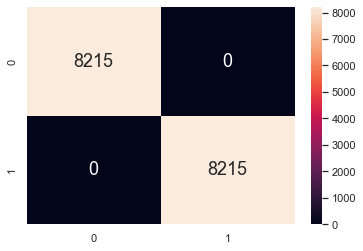

In [26]:
dt_y_pred = grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, dt_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, dt_y_pred))
print('Precision:', precision_score(y, dt_y_pred))
print('Recall:', recall_score(y, dt_y_pred))
print('F1-Score:', f1_score(y, dt_y_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

sb.heatmap(confusion_matrix(y, dt_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [27]:
getsize(grid_search)

51859

In [29]:
joblib.dump(grid_search, r"Models/Patient_1_3_5_8_9/dt_new_model_1.joblib")

['Models/Patient_1_3_5_8_9/dt_new_model_1.joblib']

In [1073]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [8, 10, 12, 14, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X, y)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 63
max_resources_: 15444
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 486
n_resources: 63
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
----------
iter: 1
n_candidates: 162
n_resources: 189
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 2
n_candidates: 54
n_resources: 567
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 3
n_candidates: 18
n_resources: 1701
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 4
n_candidates: 6
n_resources: 5103
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 5
n_candidates: 2
n_resources: 15309
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 100, 'subsample': 1}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


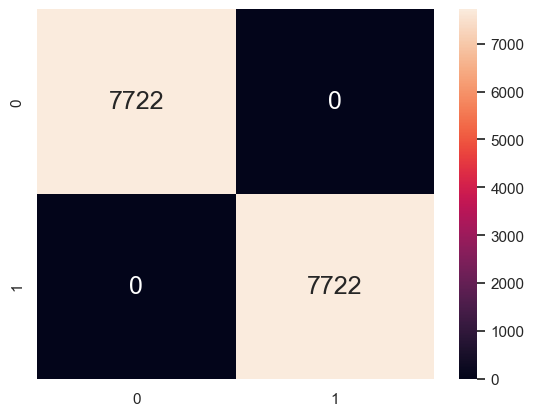

In [1074]:
lgbm_y_pred = best_lgm_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, lgbm_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, lgbm_y_pred))
print('Precision:', precision_score(y, lgbm_y_pred))
print('Recall:', recall_score(y, lgbm_y_pred))
print('F1-Score:', f1_score(y, lgbm_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, lgbm_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [1075]:
getsize(best_lgm_model)

543262

In [1076]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\Patient_1_2\lgm_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_1_2\\lgm_new_model.joblib']

In [30]:
xgb = XGBClassifier(eval_metric='logloss')

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 12, 14, 16, 18, 20, 25, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.6, 0.8, 1],
#    'min_child_weight': [1, 5, 10],
#    'gamma': [0.5, 1, 1.5],
#    'reg_alpha': [0.1, 0.5, 1],
#    'reg_lambda': [0.1, 0.5, 1]
}

hgs = HalvingGridSearchCV(xgb, parameters, cv=5, scoring='recall', verbose=2, n_jobs=-1)

best_model = hgs.fit(X, y)

print('Best parameters:', best_model.best_params_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 67
max_resources_: 16430
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 648
n_resources: 67
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_de

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[C

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time= 

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total tim

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=1

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=100, s

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimator

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=25, n_estimators=5

----------
iter: 1
n_candidates: 216
n_resources: 201
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimato

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimator

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=14, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=150, subsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=14, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsampl

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=

----------
iter: 2
n_candidates: 72
n_resources: 603
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=100, subsample=1; 

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=14, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=16, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; tota

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.5; t

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, 

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=1; t

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=50, su

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=50, subsamp

----------
iter: 3
n_candidates: 24
n_resources: 1809
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 4
n_candidates: 8
n_resources: 5427
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=150, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=50, subsample=0.5; total

----------
iter: 5
n_candidates: 3
n_resources: 16281
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.7}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


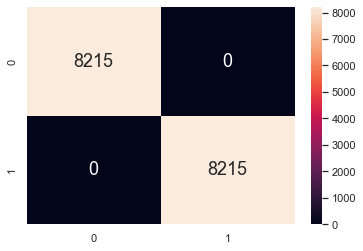

In [31]:
xgb_y_pred = best_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, xgb_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, xgb_y_pred))
print('Precision:', precision_score(y, xgb_y_pred))
print('Recall:', recall_score(y, xgb_y_pred))
print('F1-Score:', f1_score(y, xgb_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, xgb_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [32]:
getsize(best_model)

756420

In [33]:
joblib.dump(best_model, r"Models/Patient_1_3_5_8_9/xgb_new_model.joblib")

['Models/Patient_1_3_5_8_9/xgb_new_model.joblib']

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=100, subsam

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=150, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=150, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=150, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=None, n_estimators=150, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=None, n_estimators=150, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=None, n_estimators=150, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=None

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=16, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=16, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=16, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=18, n_est

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=None, n_estimators=150, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=None, n_estimators=150, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=18, n_estimators=150, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=16, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=50, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=50, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=50, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=14, n_estimators=50, su

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=14, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=14, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=14, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=None, n_esti

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=20, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=20, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=20, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=16, n_estimators=150, subsample=1; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=16, n_estimato

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=25, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=14, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=14, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estima

In [34]:
clf = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

search = HalvingGridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', factor=2, verbose=2, n_jobs=-1)

search.fit(X, y)

print("Best parameters found: ", search.best_params_)
print("Best score found: ", search.best_score_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 2053
max_resources_: 16430
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 12
n_resources: 2053
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 6
n_resources: 4106
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 3
n_resources: 8212
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 2
n_resources: 16424
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'learning_rate': 1.0, 'n_estimators': 200}
Best score found:  0.9847970692597094


For Training Data:
Accuracy: 0.9972002434570907
Precision: 0.9949109414758269
Recall: 0.9995130858186244
F1-Score: 0.9972067039106145
Sensitivity: 0.9995130858186244
Specificity: 0.994887401095557


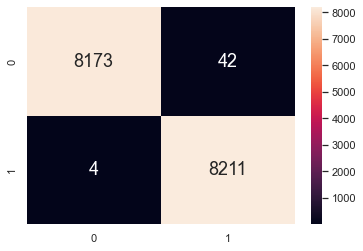

In [35]:
ada_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, ada_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, ada_y_pred))
print('Precision:', precision_score(y, ada_y_pred))
print('Recall:', recall_score(y, ada_y_pred))
print('F1-Score:', f1_score(y, ada_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, ada_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [36]:
getsize(search)

113955

In [38]:
joblib.dump(search, r"Models/Patient_1_3_5_8_9/ada_new_model.joblib")

['Models/Patient_1_3_5_8_9/ada_new_model.joblib']

In [40]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 31)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

halving_grid_search = HalvingGridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, verbose=2, n_jobs=-1, scoring='f1')

# Fit the halving grid search model
halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 202
max_resources_: 16430
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 202
Fitting 3 folds for each of 120 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 40
n_resources: 606
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 14
n_resources: 1818
Fitting 3 folds for each of 14 candidates, totalling 42 fits
----------
iter: 3
n_candidates: 5
n_resources: 5454
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 16362
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
Best score found:  0.9995114204135587
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=2, weights=distance; total time

[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=14, weights=uniform; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=14, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=14, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=14, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, 

[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean,

For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


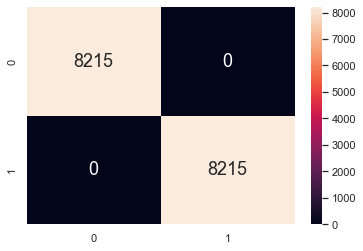

In [41]:
knn_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, knn_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, knn_y_pred))
print('Precision:', precision_score(y, knn_y_pred))
print('Recall:', recall_score(y, knn_y_pred))
print('F1-Score:', f1_score(y, knn_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, knn_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [42]:
getsize(halving_grid_search)

55761312

In [44]:
joblib.dump(halving_grid_search, r"Models/Patient_1_3_5_8_9/knn_new_model.joblib")

['Models/Patient_1_3_5_8_9/knn_new_model.joblib']

In [663]:
model = tf.keras.Sequential([
    layers.Dense(128, input_shape = (423,), activation='relu') , 
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dense(1, activation='linear') 
])

model.compile(loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

model.fit(X,y, epochs=350)

Epoch 1/350
634/634 [==============================] - 3s 4ms/step - loss: 0.4900
Epoch 2/350
634/634 [==============================] - 2s 4ms/step - loss: 0.2011
Epoch 3/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1704
Epoch 4/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1473
Epoch 5/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1261
Epoch 6/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1158
Epoch 7/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1084
Epoch 8/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1126
Epoch 9/350
634/634 [==============================] - 2s 4ms/step - loss: 0.0960
Epoch 10/350
634/634 [==============================] - 2s 4ms/step - loss: 0.0996
Epoch 11/350
634/634 [==============================] - 2s 4ms/step - loss: 0.0786
Epoch 12/350
634/634 [==============================] - 2s 4ms/step - loss: 0.0858
Epoch 13/350


In [668]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_pred=sigmoid(model.predict(X))

for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

634/634 [==============================] - 1s 2ms/step


634/634 [==============================] - 1s 2ms/step
For Test Data:
Accuracy: 0.9954608249457273
Precision: 0.9959502173054129
Recall: 0.9949674363528715
F1-Score: 0.9954585842630073


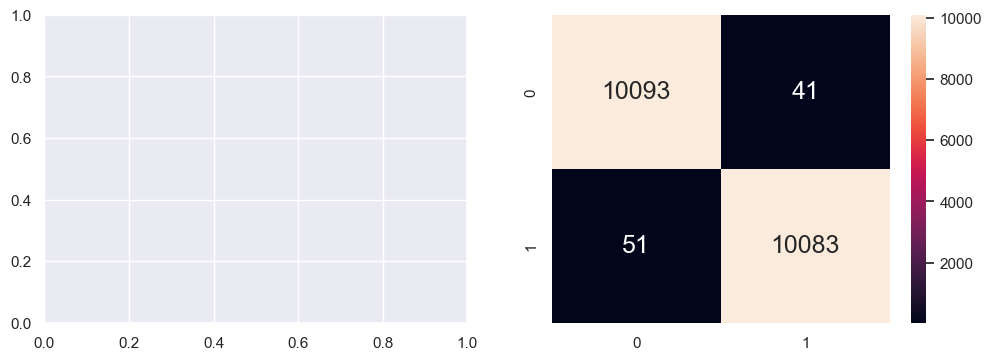

In [669]:
rf_y_test_pred = sigmoid(model.predict(X))

for i in range(len(rf_y_test_pred)):
    if rf_y_test_pred[i]>=0.5:
        rf_y_test_pred[i]=1
    else:
        rf_y_test_pred[i]=0

print("For Test Data:")
print('Accuracy:', accuracy_score(y, rf_y_test_pred))
print('Precision:', precision_score(y, rf_y_test_pred))
print('Recall:', recall_score(y, rf_y_test_pred))
print('F1-Score:', f1_score(y, rf_y_test_pred))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [670]:
model.save(r'C:\Users\Admin\Desktop\Models\Patient_8\my_model.h5')

In [671]:
getsize(model)

INFO:tensorflow:Assets written to: ram://82ccc2e3-0a80-4ba4-9246-48037a10268d/assets


205063

In [46]:
time_2=pd.read_csv(r"Labelled_Files_1/features/time_2.csv")
freq_2=pd.read_csv(r"Labelled_Files_1/features/freq_2.csv")

combined_2 = pd.concat([time_2, freq_2], axis=1)
combined_2=combined_2[combined_2['0']!=2]
combined_2.dropna(inplace=True)
combined_2

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-169.609375,-141,-202,120.894287,10.995194,169.965392,169.609375,0.0,61,...,-0.900463,111.767049,161.836917,9.893908,-1.275890,79.734772,312.399633,9.941633,-1.302381,154.679852
2,0,-170.429688,-141,-202,229.573181,15.151673,171.101875,170.429688,0.0,61,...,15.853618,709.003011,195.339984,8.460016,-0.980346,97.760694,393.012029,9.625092,-0.828660,210.170566
3,0,-165.062500,-141,-191,91.308594,9.555553,165.338857,165.062500,0.0,50,...,-0.862159,82.929618,166.776192,9.312384,-1.218474,83.386972,567.951524,8.984902,-1.119204,284.516722
4,0,-180.390625,-141,-212,162.378662,12.742789,180.840140,180.390625,0.0,71,...,9.587612,404.576626,213.575717,9.033953,-0.860744,107.633370,287.667412,8.867006,-0.714751,142.630786
5,0,-181.375000,-151,-202,119.609375,10.936607,181.704430,181.375000,0.0,51,...,0.286478,153.031344,150.205595,9.807558,-1.413812,75.890504,307.340663,10.344588,-1.306082,155.261550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6860,1,102.765625,2474,-919,126366.695068,355.480935,370.037118,186.531250,15.5,3393,...,20.862064,16987.799487,18849.821851,5.146815,6.346613,9938.107396,11022.798042,8.044759,1.122024,5514.948678
6861,1,83.320312,808,-828,50041.858337,223.700376,238.713495,171.648438,11.5,1636,...,4.785233,9119.577681,16035.213610,4.907672,2.192087,8053.916080,9934.993094,7.095158,3.327544,5099.648992
6862,1,80.265625,1040,-1010,36237.054443,190.360328,206.590477,136.484375,12.0,2050,...,7.171232,7124.541661,10040.751915,7.102830,1.954726,5111.043711,6796.996422,8.432371,0.913195,3312.730209
6863,1,207.578125,2929,-1212,324737.322021,569.857282,606.486603,352.562500,21.0,4141,...,12.236772,58955.286615,39728.780850,4.875587,2.425278,20323.674280,17409.600997,8.058896,-0.179875,8683.843164


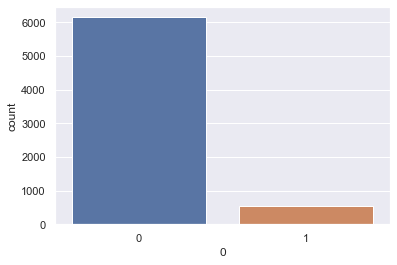

In [47]:
X = combined_2.drop('0', axis=1)
y = combined_2['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [48]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

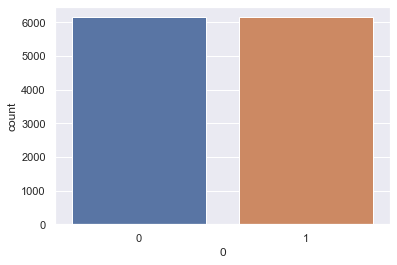

In [49]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [50]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [51]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 455
max_resources_: 12304
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 455
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 1365
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 4095
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 12285
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best estimator found:  DecisionTreeClassifier(min_samples_split=5)


For Training Data:
Accuracy: 0.9998374512353706
Precision: 1.0
Recall: 0.9996749024707412
F1-Score: 0.9998374248089741
Sensitivity: 0.9996749024707412
Specificity: 1.0


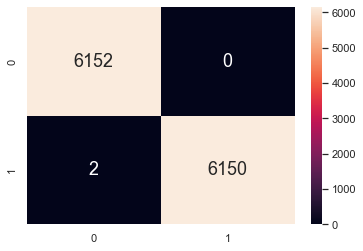

In [52]:
dt_y_pred = grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, dt_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, dt_y_pred))
print('Precision:', precision_score(y, dt_y_pred))
print('Recall:', recall_score(y, dt_y_pred))
print('F1-Score:', f1_score(y, dt_y_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

sb.heatmap(confusion_matrix(y, dt_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [53]:
getsize(grid_search)

40433

In [54]:
joblib.dump(grid_search, r"Models/Patient_1_3_5_8_9/dt_new_model_2.joblib")

['Models/Patient_1_3_5_8_9/dt_new_model_2.joblib']

In [43]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10, 12, 14, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X, y)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 77
max_resources_: 18782
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 486
n_resources: 77
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
----------
iter: 1
n_candidates: 162
n_resources: 231
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 2
n_candidates: 54
n_resources: 693
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 3
n_candidates: 18
n_resources: 2079
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 4
n_candidates: 6
n_resources: 6237
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 150, 'subsample': 1}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


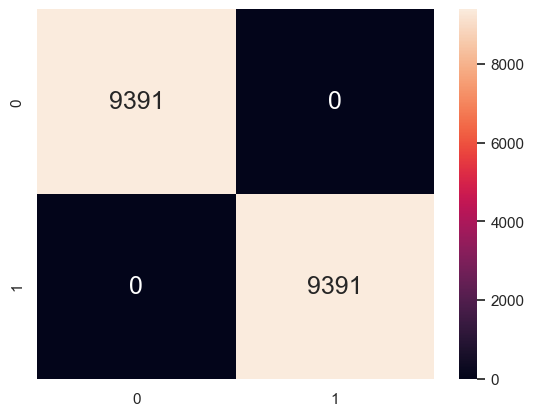

In [44]:
lgbm_y_pred = best_lgm_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, lgbm_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, lgbm_y_pred))
print('Precision:', precision_score(y, lgbm_y_pred))
print('Recall:', recall_score(y, lgbm_y_pred))
print('F1-Score:', f1_score(y, lgbm_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, lgbm_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [45]:
getsize(best_lgm_model)

718158

In [46]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\Patient_2\lgm_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_2\\lgm_new_model_1.joblib']

In [55]:
xgb = XGBClassifier(eval_metric='logloss')

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 12, 14, 16, 18, 20, 25, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.6, 0.8, 1],
#    'min_child_weight': [1, 5, 10],
#    'gamma': [0.5, 1, 1.5],
#    'reg_alpha': [0.1, 0.5, 1],
#    'reg_lambda': [0.1, 0.5, 1]
}

hgs = HalvingGridSearchCV(xgb, parameters, cv=5, scoring='f1', verbose=2, n_jobs=-1)

best_model = hgs.fit(X, y)

print('Best parameters:', best_model.best_params_)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 20
max_resources_: 12304
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 20
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 288
n_resources: 60
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END cri

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split=10; total time=   0.

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.1

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split=10; total time=  

----------
iter: 2
n_candidates: 96
n_resources: 180
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 540
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 1620
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 18, 'n_estimators': 150, 'subsample': 0.7}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


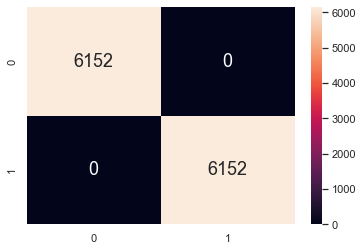

In [56]:
xgb_y_pred = best_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, xgb_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, xgb_y_pred))
print('Precision:', precision_score(y, xgb_y_pred))
print('Recall:', recall_score(y, xgb_y_pred))
print('F1-Score:', f1_score(y, xgb_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, xgb_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [57]:
getsize(best_model)

656125

In [58]:
joblib.dump(best_model, r"Models/Patient_1_3_5_8_9/xgb_new_model_2.joblib")

['Models/Patient_1_3_5_8_9/xgb_new_model_2.joblib']

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=14, n_estimators=200, subsample=1; total time= 

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=18, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=18, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=18, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=16, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=16, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=16, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=16, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=16, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=100, su

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=None, n_estimators=50, su

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=150, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=150, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=150, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=150, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=150, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=200, subsample=0.5; tot

In [629]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

halving_grid_search = HalvingGridSearchCV(estimator = svc, param_grid = param_grid, scoring='f1', cv = 3, verbose=2, n_jobs=-1)

halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 2086
max_resources_: 18782
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 2086
Fitting 3 folds for each of 25 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 9
n_resources: 6258
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 2
n_candidates: 3
n_resources: 18774
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score found:  0.9852496474777036


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


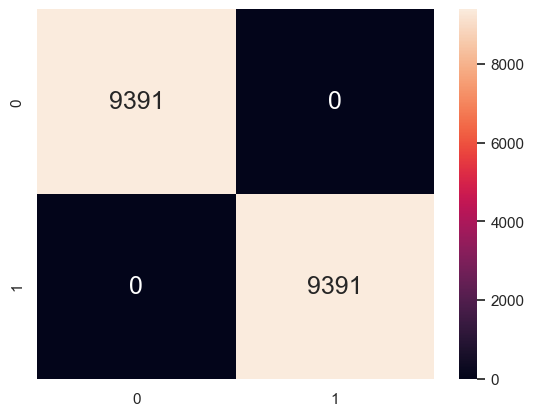

In [630]:
svc_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, svc_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, svc_y_pred))
print('Precision:', precision_score(y, svc_y_pred))
print('Recall:', recall_score(y, svc_y_pred))
print('F1-Score:', f1_score(y, svc_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, svc_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [631]:
getsize(halving_grid_search)

14544545

In [632]:
joblib.dump(halving_grid_search, r"C:\Users\Admin\Desktop\Models\Patient_2\svc_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_2\\svc_new_model_1.joblib']

In [59]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 31)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

halving_grid_search = HalvingGridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, verbose=2, n_jobs=-1, scoring='f1')

# Fit the halving grid search model
halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 151
max_resources_: 12304
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 151
Fitting 3 folds for each of 120 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 40
n_resources: 453
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 14
n_resources: 1359
Fitting 3 folds for each of 14 candidates, totalling 42 fits
----------
iter: 3
n_candidates: 5
n_resources: 4077
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 12231
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
Best score found:  0.9954517190532357


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


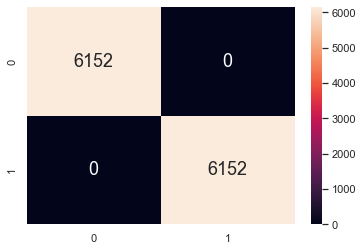

In [60]:
knn_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, knn_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, knn_y_pred))
print('Precision:', precision_score(y, knn_y_pred))
print('Recall:', recall_score(y, knn_y_pred))
print('F1-Score:', f1_score(y, knn_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, knn_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [61]:
getsize(halving_grid_search)

41765935

In [62]:
joblib.dump(halving_grid_search, r"Models/Patient_1_3_5_8_9/knn_new_model_2.joblib")

['Models/Patient_1_3_5_8_9/knn_new_model_2.joblib']

In [78]:
time_3=pd.read_csv(r"1_3_5_8_9/Labelled_Files_Train/features/time_3.csv")
freq_3=pd.read_csv(r"1_3_5_8_9/Labelled_Files_Train/features/freq_3.csv")

combined_3 = pd.concat([time_3, freq_3], axis=1)
combined_3=combined_3[combined_3['0']!=2]
combined_3 = combined_3.dropna()
combined_3

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-168.276042,-141,-202,192.199843,13.863616,168.846161,168.276042,0.0,61,...,18.198913,825.876091,259.709800,9.357268,-1.180830,88.164395,640.628217,9.417840,-0.466981,209.804072
2,0,-170.322917,-141,-191,140.687391,11.861172,170.735419,170.322917,0.0,50,...,0.927603,170.731847,261.958070,9.455805,-1.016898,88.448302,703.621850,8.888386,-0.844602,241.516971
3,0,-180.895833,-141,-212,163.843316,12.800130,181.348134,180.895833,0.0,71,...,3.354739,299.084449,297.999131,9.755019,-1.413713,101.843896,768.613195,9.479480,-0.653214,262.818185
4,0,-187.890625,-171,-212,87.586995,9.358792,188.123560,187.890625,0.0,41,...,-1.186749,94.518719,256.661821,9.822965,-1.410471,84.484903,441.820537,10.001567,-1.267011,147.979389
5,0,-186.031250,-151,-222,173.259440,13.162805,186.496342,186.031250,0.0,71,...,12.063644,670.144669,408.843585,8.394497,-0.959191,135.585366,879.474751,8.919278,0.430239,289.385625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,1,70.682292,171,-20,372.143853,19.291030,73.267525,70.890625,1.0,191,...,1.303071,230.444363,505.816944,8.641676,-0.753549,165.953672,995.274726,9.637037,-0.514239,342.407347
6068,1,90.713542,2474,-919,88794.048150,297.983302,311.485144,157.442708,23.5,3393,...,13.662285,21799.873276,34580.623930,5.062950,5.145046,11428.306631,16985.195320,8.828896,0.065458,5477.722856
6069,1,82.125000,1040,-1010,48902.505208,221.139108,235.896208,160.104167,19.0,2050,...,5.584718,5599.328477,19031.525337,5.088346,2.826157,5956.452642,14976.384572,7.096708,3.195285,4974.139992
6070,1,165.317708,2929,-1212,228682.873020,478.207981,505.977092,280.359375,25.0,4141,...,18.077918,41469.149781,47952.412894,4.551481,3.287436,16111.920576,19626.592411,7.807002,0.332418,6392.440587


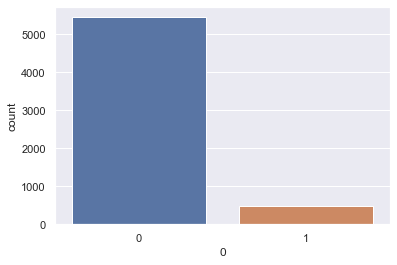

In [80]:
X = combined_3.drop('0', axis=1)
y = combined_3['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [81]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

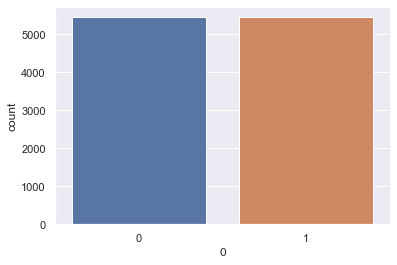

In [82]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [83]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [85]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 403
max_resources_: 10896
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 403
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 1209
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 3627
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 10881
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier(criterion='entropy', max_depth=100)


In [89]:
dt_y_train_pred = grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, dt_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, dt_y_train_pred))
print('Precision:', precision_score(y_train, dt_y_train_pred))
print('Recall:', recall_score(y_train, dt_y_train_pred))
print('F1-Score:', f1_score(y_train, dt_y_train_pred))

rf_train_acc=accuracy_score(y_train, dt_y_train_pred)
rf_train_pre=precision_score(y_train, dt_y_train_pred)
rf_train_rec=recall_score(y_train, dt_y_train_pred)
rf_train_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

dt_y_test_pred = grid_search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, dt_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, dt_y_test_pred))
print('Precision:', precision_score(y_test, dt_y_test_pred))
print('Recall:', recall_score(y_test, dt_y_test_pred))
print('F1-Score:', f1_score(y_test, dt_y_test_pred))

rf_test_acc=accuracy_score(y_train, dt_y_train_pred)
rf_test_pre=precision_score(y_train, dt_y_train_pred)
rf_test_rec=recall_score(y_train, dt_y_train_pred)
rf_test_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

For Training Data:


NameError: name 'y_train' is not defined

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time= 

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=

In [ ]:
getsize(grid_search)

In [ ]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\Patient_2\dt_new_model_2.joblib")

In [ ]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_lgm_model.best_params_)

In [ ]:
lgbm_y_train_pred = best_lgm_model.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, lgbm_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, lgbm_y_train_pred))
print('Precision:', precision_score(y_train, lgbm_y_train_pred))
print('Recall:', recall_score(y_train, lgbm_y_train_pred))
print('F1-Score:', f1_score(y_train, lgbm_y_train_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

lgbm_y_test_pred = best_lgm_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, lgbm_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, lgbm_y_test_pred))
print('Precision:', precision_score(y_test, lgbm_y_test_pred))
print('Recall:', recall_score(y_test, lgbm_y_test_pred))
print('F1-Score:', f1_score(y_test, lgbm_y_test_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, lgbm_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, lgbm_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [ ]:
getsize(best_lgm_model)

In [ ]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\Patient_2\lgm_new_model_2.joblib")

In [211]:
time_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_4.csv")
freq_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_4.csv")

combined_4 = pd.concat([time_4, freq_4], axis=1)
combined_4=combined_4[combined_4['0']!=2]
combined_4

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,mean_A_V,...,ENt_T_L,peak_A_F,peak_A_V,peak_A_L,peak_L_F,peak_L_V,peak_L_L,peak_T_F,peak_T_V,peak_T_L
0,0,-50.175781,90,-161,1230.887070,35.084000,61.224963,54.238281,8.0,990.007812,...,4.091580,146.200374,20.868415,42.680194,1254.653165,21.406355,70.985272,223.571306,35.183787,57.220186
1,0,-64.207031,30,-151,783.656357,27.993863,70.044266,64.910156,5.0,990.339844,...,4.221583,58.149955,21.018384,42.389059,306.610679,14.663687,48.816071,44.755281,45.401767,39.928246
2,0,-83.085938,20,-181,1249.969177,35.354903,90.295305,83.398438,2.0,997.089844,...,4.419747,321.022851,30.721405,39.526208,2074.636919,48.933490,73.154893,89.428789,165.880517,18.582503
3,0,-89.230469,-20,-151,573.247665,23.942591,92.386818,89.230469,0.0,986.742188,...,4.177780,58.915787,24.686857,191.636920,282.082723,13.838828,114.220573,333.284716,95.306759,44.900720
4,0,-76.101562,60,-212,745.403748,27.302083,80.850798,76.960938,2.0,985.609375,...,4.121109,43.713979,8.951603,20.869761,245.949335,7.446249,66.117817,80.106269,21.922348,44.922931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12075,1,328.222656,5121,-2727,370299.055893,608.522026,691.396535,435.128906,10.5,990.707031,...,4.047900,12986.150021,16501.232157,5623.437210,11504.560055,1245.971152,3813.175101,1792.708754,688.634522,1340.138156
12076,1,298.464844,3242,-1959,187980.436264,433.567107,526.366507,361.847656,7.0,981.425781,...,4.445951,9754.295089,9979.685726,4061.668938,12795.353296,1012.226430,8121.865603,752.610126,1553.457027,112.593972
12077,1,206.660156,4000,-2151,241830.888412,491.763041,533.422261,288.855469,9.0,1019.484375,...,3.928866,15521.002964,5181.441351,3958.892886,6050.295583,361.850844,4847.160958,1131.475224,1439.748901,409.120598
12078,1,227.582031,3212,-1181,126782.360458,356.065107,422.582467,271.488281,7.0,1024.222656,...,4.050248,4293.518075,1943.258183,1917.892132,3683.381722,899.308911,3386.028923,565.948999,1180.913864,582.929931


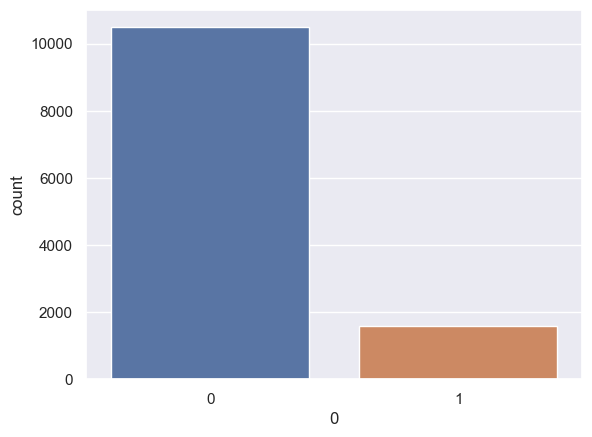

In [212]:
X = combined_4.drop('0', axis=1)
y = combined_4['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [213]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

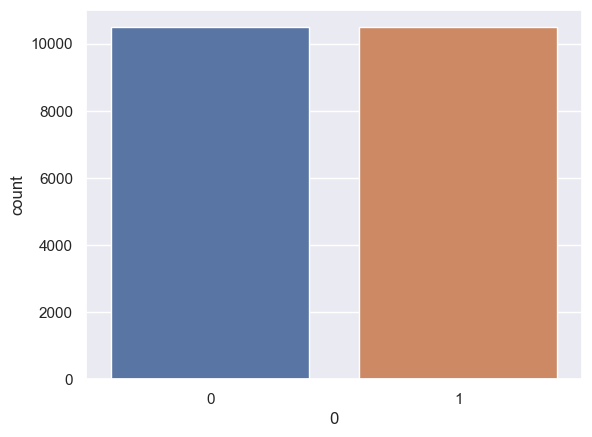

In [214]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [215]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [217]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [50 ,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2 ,5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = HalvingGridSearchCV(rf, params, scoring='f1', n_jobs=-1, verbose=2)

search.fit(X_train, y_train)

best_params = search.best_params_
best_estimator = search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 181
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 181
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 543
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1629
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 4887
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 14661
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator found:  RandomForestClassifier(n_estimators=200, random_state=42)


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9890336935791482
Precision: 0.979874213836478
Recall: 0.9983979493752002
F1-Score: 0.9890493572448817
Sensitivity: 0.9983979493752002
Specificity: 0.9798170923998738


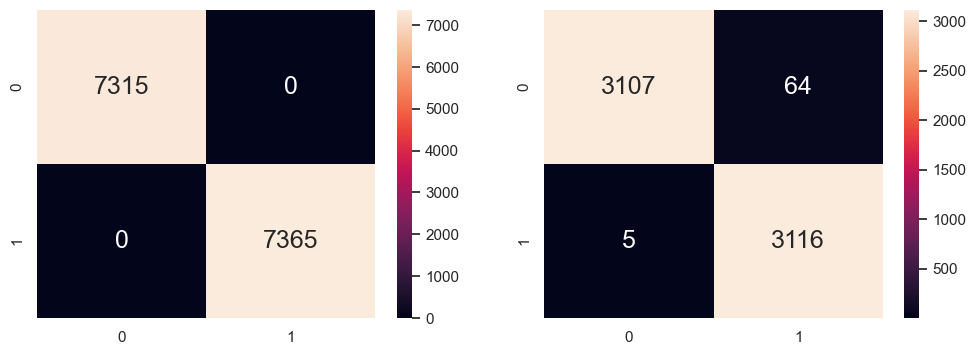

In [218]:
rf_y_train_pred = search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, rf_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, rf_y_train_pred))
print('Precision:', precision_score(y_train, rf_y_train_pred))
print('Recall:', recall_score(y_train, rf_y_train_pred))
print('F1-Score:', f1_score(y_train, rf_y_train_pred))

rf_train_acc=accuracy_score(y_train, rf_y_train_pred)
rf_train_pre=precision_score(y_train, rf_y_train_pred)
rf_train_rec=recall_score(y_train, rf_y_train_pred)
rf_train_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()


rf_y_test_pred = search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rf_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred))
print('Recall:', recall_score(y_test, rf_y_test_pred))
print('F1-Score:', f1_score(y_test, rf_y_test_pred))

rf_test_acc=accuracy_score(y_train, rf_y_train_pred)
rf_test_pre=precision_score(y_train, rf_y_train_pred)
rf_test_rec=recall_score(y_train, rf_y_train_pred)
rf_test_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [219]:
getsize(search)

10419923

In [82]:
joblib.dump(search, r"C:\Users\Admin\Desktop\Models\rf_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\rf_new_model_3.joblib']

In [220]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 543
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 543
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 1629
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 4887
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 14661
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier()


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9772727272727273
Precision: 0.9676507537688442
Recall: 0.987183595001602
F1-Score: 0.977319587628866
Sensitivity: 0.987183595001602
Specificity: 0.967518133081047



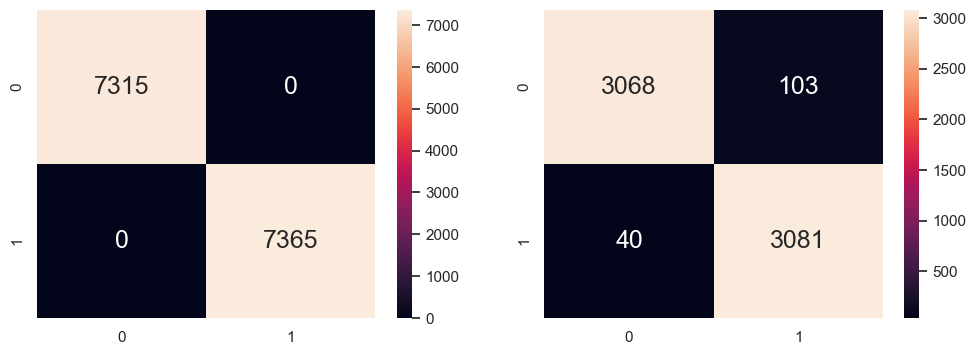

In [221]:
dt_y_train_pred = grid_search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, dt_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, dt_y_train_pred))
print('Precision:', precision_score(y_train, dt_y_train_pred))
print('Recall:', recall_score(y_train, dt_y_train_pred))
print('F1-Score:', f1_score(y_train, dt_y_train_pred))

rf_train_acc=accuracy_score(y_train, dt_y_train_pred)
rf_train_pre=precision_score(y_train, dt_y_train_pred)
rf_train_rec=recall_score(y_train, dt_y_train_pred)
rf_train_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

dt_y_test_pred = grid_search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, dt_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, dt_y_test_pred))
print('Precision:', precision_score(y_test, dt_y_test_pred))
print('Recall:', recall_score(y_test, dt_y_test_pred))
print('F1-Score:', f1_score(y_test, dt_y_test_pred))

rf_test_acc=accuracy_score(y_train, dt_y_train_pred)
rf_test_pre=precision_score(y_train, dt_y_train_pred)
rf_test_rec=recall_score(y_train, dt_y_train_pred)
rf_test_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [222]:
getsize(grid_search)

68209

In [86]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\dt_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\dt_new_model_3.joblib']

In [223]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 972
n_resources: 20
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
----------
iter: 1
n_candidates: 324
n_resources: 60
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
----------
iter: 2
n_candidates: 108
n_resources: 180
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 3
n_candidates: 36
n_resources: 540
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 4
n_candidates: 12
n_resources: 1620
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 14580
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.7, 'l

For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9903051493960585
Precision: 0.9820415879017014
Recall: 0.9987183595001602
F1-Score: 0.9903097696584591
Sensitivity: 0.9987183595001602
Specificity: 0.9820245979186376



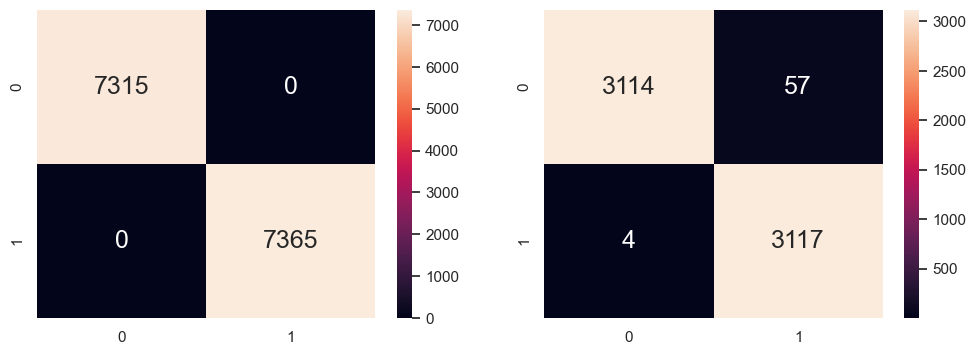

In [224]:
lgbm_y_train_pred = best_lgm_model.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, lgbm_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, lgbm_y_train_pred))
print('Precision:', precision_score(y_train, lgbm_y_train_pred))
print('Recall:', recall_score(y_train, lgbm_y_train_pred))
print('F1-Score:', f1_score(y_train, lgbm_y_train_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

lgbm_y_test_pred = best_lgm_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, lgbm_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, lgbm_y_test_pred))
print('Precision:', precision_score(y_test, lgbm_y_test_pred))
print('Recall:', recall_score(y_test, lgbm_y_test_pred))
print('F1-Score:', f1_score(y_test, lgbm_y_test_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, lgbm_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, lgbm_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [225]:
getsize(best_lgm_model)

1030183

In [90]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\lgm_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\lgm_new_model_3.joblib']